In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import os

### Global Variables

In [2]:
plots_foldername = 'plots'
def save_plot(plt, filename):
    if not os.path.exists(plots_foldername):
        os.makedirs(plots_foldername)
    plt.savefig(f'{plots_foldername}/{filename}.pdf', format="pdf", bbox_inches="tight")

### Make Dataset Analysis Plot

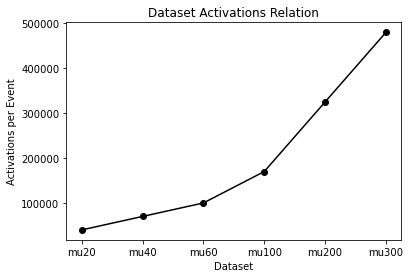

In [105]:
activations = [40000, 70000, 100000, 170000, 325000, 480000]
labels = ['mu20', 'mu40', 'mu60', 'mu100', 'mu200', 'mu300']

plt.plot(labels, activations, marker='o', color='black')
plt.xlabel('Dataset')
plt.ylabel('Activations per Event')
activation_event_relation_title = 'Dataset Activations Relation'
plt.title(activation_event_relation_title)
save_plot(plt, activation_event_relation_title)
plt.show()

### Load Data

In [4]:
import loader

src_dir = './data'
benchmarks = loader.load_benchmarks_from_dir(src_dir)
df = pd.DataFrame(benchmarks)
df.head()

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,label,filename
0,BM_CCA/cca_simplified_sv/DatasetFileIndex:0/ma...,0,0,BM_CCA/cca_simplified_sv/DatasetFileIndex:0/ma...,iteration,1,0,1,33,21.277545,1503.323035,ms,tml_full/ttbar_mu20/,cuda_cca.json
1,BM_CCA/cca_simplified_sv/DatasetFileIndex:1/ma...,0,1,BM_CCA/cca_simplified_sv/DatasetFileIndex:1/ma...,iteration,1,0,1,20,34.963654,3296.441827,ms,tml_full/ttbar_mu40/,cuda_cca.json
2,BM_CCA/cca_simplified_sv/DatasetFileIndex:2/ma...,0,2,BM_CCA/cca_simplified_sv/DatasetFileIndex:2/ma...,iteration,1,0,1,16,44.425600,5749.924185,ms,tml_full/ttbar_mu60/,cuda_cca.json
3,BM_CCA/cca_simplified_sv/DatasetFileIndex:3/ma...,0,3,BM_CCA/cca_simplified_sv/DatasetFileIndex:3/ma...,iteration,1,0,1,12,60.613563,11622.533302,ms,tml_full/ttbar_mu100/,cuda_cca.json
4,BM_CCA/cca_simplified_sv/DatasetFileIndex:4/ma...,0,4,BM_CCA/cca_simplified_sv/DatasetFileIndex:4/ma...,iteration,1,0,1,8,88.080671,26280.240893,ms,tml_full/ttbar_mu200/,cuda_cca.json


### Preprocessing

In [5]:
import preprocessor

df = preprocessor.transform_dataframe(df)
df.head()

,benchmark,programming_model,target_mode,cpu_cores,environment,target,algorithm,partition_size,omega,omega_alt,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
0,cuda_cca,CUDA,GPU,1,traccc,A6000,SimplifiedSV,1024,0.000053,18889.068237,mu20,40191.3,2.127755,150.332303,ms,33,1
1,cuda_cca,CUDA,GPU,1,traccc,A6000,SimplifiedSV,1024,0.000051,19663.248096,mu40,68749.9,3.496365,329.644183,ms,20,1
2,cuda_cca,CUDA,GPU,1,traccc,A6000,SimplifiedSV,1024,0.000043,23037.280242,mu60,102344.5,4.442560,574.992418,ms,16,1
3,cuda_cca,CUDA,GPU,1,traccc,A6000,SimplifiedSV,1024,0.000035,28322.571924,mu100,171673.2,6.061356,1162.253330,ms,12,1
4,cuda_cca,CUDA,GPU,1,traccc,A6000,SimplifiedSV,1024,0.000027,36776.116242,mu200,323926.5,8.808067,2628.024089,ms,8,1


## Main helper functions to plot bar charts

In [6]:
# The number of benchmarks for each run based on the different datasets used
nbr_of_benchmarks_per_run = len(df['dataset'].unique())
# Show a preview of a df listing the first dataset for each benchmark
def preview_df(df):
    return df[::nbr_of_benchmarks_per_run]

In [7]:
# data = list of data inputs
# datalabels = list of labels for the data
# labels = x value labels
def plot_multi_bar_chart(data, datalabels, labels, colors, y_axis_label, title=None, filename=None):
    num_data = len(labels)
    num_bars = len(datalabels)

    X_axis = np.arange(num_data)

    # calculate the width of the figure dynamically based on number of data points
    FIG_WIDTH_CONSTANT_PER_BAR = 0.5
    fig_width = num_data*num_bars*FIG_WIDTH_CONSTANT_PER_BAR
    plt.figure(figsize=(fig_width,5))
       
    # calculate offset width
    TOTAL_WIDTH_ALL_BARS = 0.8 # basically defines the space between data of two different labels (not to confuse with datalabels)
    BAR_WIDTH = TOTAL_WIDTH_ALL_BARS / num_bars
    current_offset = -(BAR_WIDTH * (num_bars/2)) + BAR_WIDTH/2 # center the bars
    # iterate over data and adjust offset after each iteration
    for d, l, c in zip (data, datalabels, colors):
        plt.bar(X_axis + current_offset, d, BAR_WIDTH, label = l, color=c)
        current_offset += BAR_WIDTH

    plt.xticks(X_axis, labels)
    plt.xlabel("Dataset")
    plt.ylabel(y_axis_label)
    plt.legend(loc="upper left")
    if title:
        plt.title(title)
    if filename:
        save_plot(plt, filename)
    plt.show()

In [9]:
# Returns a list eiterh based on a tuple or string based on input
def convert_to_list(str_or_tup):
    return list(str_or_tup) if isinstance(str_or_tup, tuple) else [str_or_tup]

In [109]:
# Create a label based on values in the dataframe. This function supposes that the result for df[(c1,c2,c3)]==(v1,v2,v3) has always the same content for fields
# columns = either single or tuple of column names
# value =  a unique identifier for a single benchmark having with matching values in column(s)
def construct_label(df, columns, value, fields):
    first_row = df[multi_column_mask(df, columns, value)].iloc[0]
    # initialize an empty string
    label = ''
    fields_list = convert_to_list(fields)
    for field in fields_list:
        label = label + str(first_row[field]) + ', '
    return label[:-2] # to remove trailing comma and space

In [11]:
# Fetch a color based on values in the dataframe for a particular benchmark.
# columns = either single or tuple of column names
# value =  a unique identifier for a single benchmark having with matching values in column(s)
def fetch_color(df, columns, value):
    first_row = df[multi_column_mask(df, columns, value)].iloc[0]
    color_key = (first_row['programming_model'], first_row['target_mode'], first_row['environment'], first_row['algorithm'])
    return color_map[color_key]

In [12]:
# columns: tuple
# values: tuple (same size as columns)
def multi_column_mask(df, columns, values):
    # Create first an index over the columns 
    columns_list = convert_to_list(columns) # because columns can be string or tuple
    return df.set_index(columns_list).index == values

In [13]:
# Get the index position of the elements in source_list when source_list would be ordered
def argsort(source_list):
    # http://stackoverflow.com/questions/3071415/efficient-method-to-calculate-the-rank-vector-of-a-list-in-python
    return sorted(range(len(source_list)), key=source_list.__getitem__)

In [14]:
# Create a copy of the source_list where the order determines the sequence in the list
# Usage example with argsort: sorted_list = reorder(source_list, argsort(source_list))
def reorder(source_list, order):
    return [source_list[idx] for idx in order]

In [15]:
# Plots a multi-column bar plot chart for a dataset based on the distinctive values within one column. 
# Label fields determines the columns used to build the labels in the legend (e.g. ('programming_model', 'environment', 'target_mode')).
def plot_df(df, distinct_columns, label_fields, 
            value_field='kernel_time', 
            value_axis_label='Kernel Execution Time [ms]', 
            title=None, 
            override_colors=None, 
            plot_func=plot_multi_bar_chart):
    # Create copy to work with
    df = df.copy()
        
    # Extract data from dataframe for plot
    dc_list = convert_to_list(distinct_columns) # special because distinct_columns can be string or tuple
    distinct_rows = list(df.groupby(dc_list).size().index) # are the identifier for groupings in this visualization
    data = [df.loc[multi_column_mask(df, distinct_columns, row), value_field].tolist() for row in distinct_rows]
    labels = [construct_label(df=df,
                              columns=distinct_columns,
                              value=row,
                              fields=label_fields)
                    for row in distinct_rows]
    colors = [fetch_color(df, columns=distinct_columns, value=row) for row in distinct_rows]
    datasets = df['dataset'].unique().tolist()
    
    # Override some colors based on indices after sorting the dataframe (can be a bit tricky), but most convenient for on-the-fly optimizations
    if override_colors:
        # Override colors specified as (index, color) pairs
        for override in override_colors:
            colors[override[0]] = override[1]        
    
    plot_func(
        data=data,
        datalabels=labels,
        labels=datasets,
        colors=colors,
        y_axis_label=value_axis_label,
        title=title,
        filename=title
    )

In [16]:
# This could be usd to sort a dataframe, with sort_by being either a single column name or a tuple of column names:
# Sort if desired    
#    if sort_by:
#        order = convert_to_list(sort_by)
#        order.append('activations') # makes sure to always restore order based on dataset size
#        df = df.sort_values(order) # could add second param to order asc/desc        

# It does not work because we use the index to get unique values... this is not optimal, hombre!

## Color Management

In [153]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, sort=False):

    cell_width = 340
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40
    
    if sort:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 2
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        label = ''
        for field in name:
            label = label + field + ', '
        label = label[:-2] # to remove trailing comma and space
        
        ax.text(text_pos_x, y, label, fontsize=12,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

In [150]:
# Keys generated using:
# df.groupby(['programming_model', 'target_mode', 'environment', 'algorithm']).size().index
color_map = {
    (   'C++', 'Single-core CPU',   'traccc',              'SparseCCL'): '#FFE599',
    #(  'CUDA',         'GPU',   'traccc',               'fast_sv_1'): '#A680B8',
    (  'CUDA',         'GPU',   'traccc',               'FastSV'): '#D688BA',
    (  'CUDA',         'GPU',   'traccc',           'SimplifiedSV'): '#B89CB6',
    ('std::par',         'GPU', 'isolated',               'FastSV'): '#CDA2BE',
    ('std::par',         'GPU', 'isolated',              'SparseCCL'): '#FFF2CC',
    #('std::par',         'GPU',   'traccc',               'fast_sv_1'): '#9A6FB3',
    ('std::par',         'GPU',   'traccc',               'FastSV'): '#B5739D',
    ('std::par',         'GPU',   'traccc',           'SimplifiedSV'): '#9C849A',
    ('std::par',         'GPU',   'traccc',              'SparseCCL'): '#FFD966',
    ('std::par',   'Multicore CPU', 'isolated',               'FastSV'): '#C3ABD0',
    ('std::par',   'Multicore CPU', 'isolated',              'SparseCCL'): '#FFCE9F',
    ('std::par',   'Multicore CPU',   'traccc',              'SparseCCL'): '#FCDD5E',
    ('std::par', 'Single-core CPU', 'isolated',               'FastSV'): '#E1D5E7',
    ('std::par', 'Single-core CPU', 'isolated',              'SparseCCL'): '#FFE97A',
    #('std::par', 'Single-core CPU',   'traccc',               'fast_sv_1'): '#B683D4',
    ('std::par', 'Single-core CPU',   'traccc',               'FastSV'): '#E6D0DE',
    ('std::par', 'Single-core CPU',   'traccc',           'SimplifiedSV'): '#9C7A92',
    ('std::par', 'Single-core CPU',   'traccc',              'SparseCCL'): '#FAC65F',
}

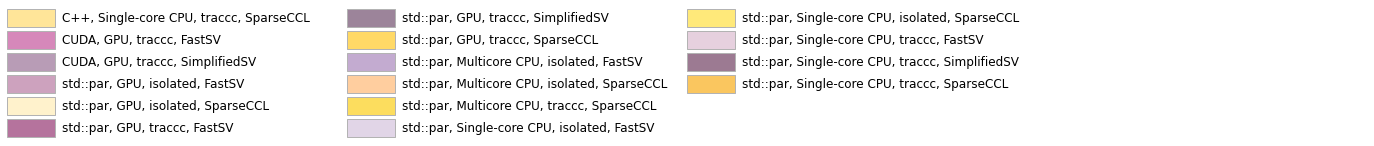

In [155]:
plot_colortable(color_map)
save_plot(plt, 'Color Legend')
plt.show()

### Prepare all possible masks for filtering the dataframe later

In [17]:
# Mask for all benchmarks ran on the alternative GPU geforce2080
geforce_benchmarks = df.query("benchmark.str.contains('geforce_2080')")['benchmark']
geforce_mask = df['benchmark'].isin(geforce_benchmarks)

# Mask for all benchmarks focusing on the effect of overclocking
overclock_benchmarks = df.query("benchmark.str.contains('overclock')")['benchmark']
overclock_mask = df['benchmark'].isin(overclock_benchmarks)
overclocked_benchmarks = df.query("benchmark.str.contains('overclocked')")['benchmark'] # more specific filter!
overclocked_mask = df['benchmark'].isin(overclocked_benchmarks)

# Mask for all benchmarks focusing on the impact of partition size
partitioning_benchmarks = df.query("algorithm.str.contains('partition')")['algorithm']
partitioning_mask = df['algorithm'].isin(partitioning_benchmarks)

# Mask for all benchmarks using nostdpar
nostdpar_benchmarks = df.query("benchmark.str.contains('nostdpar')")['benchmark']
nostdpar_mask = df['benchmark'].isin(nostdpar_benchmarks)

# Programming model masks
cpp_mask = df['programming_model'] == 'C++'
cuda_mask = df['programming_model'] == 'CUDA'
stdpar_mask = df['programming_model'] == 'std::par'

# Environment masks
traccc_mask = df['environment'] == 'traccc'
isolated_mask = df['environment'] == 'isolated'

# Target mask
gpu_mask = df['target_mode'] == 'GPU'
singlecore_mask = df['target_mode'] == 'Single-core CPU'
multicore_mask = df['target_mode'] == 'Multicore CPU'

# Algorithm mask
sparse_ccl_mask = df['algorithm'] == 'SparseCCL'
simplified_sv_mask = df['algorithm'] == 'SimplifiedSV'
# fast_sv_one_mask = df['algorithm'] == 'fast_sv_1'
fast_sv_two_mask = df['algorithm'] == 'FastSV'
sv_algo_mask = simplified_sv_mask | fast_sv_two_mask

# Mask for all benchmarks testing different partition sizes
param_tuning_mask = df['partition_size'] < 1024 # | df['partition_size'].isnull()

## Compare isolated environment with traccc

In [18]:
def plot_isolated_env_vs_traccc(df, algorithm_name):
    plot_df(df=df,
            distinct_columns='benchmark',
            label_fields=('environment', 'target_mode',), 
            title=f'Performance of {algorithm_name} in traccc vs. isolated environment',
    )

In [19]:
# Get all stdpar benchmarks using fast_sv_2 (except the one from other GPU)
fast_sv_two = df.loc[fast_sv_two_mask & ~geforce_mask & ~ overclock_mask & stdpar_mask & ~param_tuning_mask]
preview_df(fast_sv_two)

,benchmark,programming_model,target_mode,cpu_cores,environment,target,algorithm,partition_size,omega,omega_alt,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
168,stdpar_cca_gpu,std::par,GPU,1,traccc,A6000,FastSV,1024,17.113007,0.058435,mu20,40191.3,63.968937,275.816659,ms,1,1
216,stdpar_cca_nostdpar,std::par,Single-core CPU,1,traccc,Xeon 5220,FastSV,1024,0.000154,6501.066980,mu20,40191.3,6.182262,150.528085,ms,12,1
222,fast_sv_gpu,std::par,GPU,1,isolated,A6000,FastSV,1024,16.237333,0.061586,mu20,40191.3,60.695642,198.189951,ms,1,1
246,fast_sv_multicore,std::par,Multicore CPU,72,isolated,Xeon 5220,FastSV,1024,0.003361,297.524997,mu20,40191.3,1.876187,129.382973,ms,34,1
270,fast_sv_nostdpar,std::par,Single-core CPU,1,isolated,Xeon 5220,FastSV,1024,0.000138,7252.253976,mu20,40191.3,5.541905,146.272219,ms,11,1


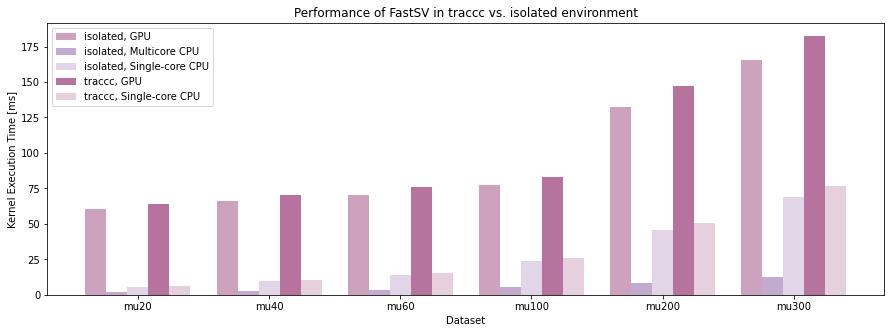

In [20]:
plot_isolated_env_vs_traccc(fast_sv_two, 'FastSV')

In [21]:
# Get all stdpar benchmarks using fast_sv_2 (except the one from other GPU)
sparse_ccl = df.loc[sparse_ccl_mask & ~geforce_mask & ~ overclock_mask & stdpar_mask]
preview_df(sparse_ccl)

,benchmark,programming_model,target_mode,cpu_cores,environment,target,algorithm,partition_size,omega,omega_alt,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
150,stdpar_cca_gpu,std::par,GPU,1,traccc,A6000,SparseCCL,<NA>,26.918521,0.037149,mu20,40191.3,100.622242,393.128219,ms,1,1
198,stdpar_cca_nostdpar,std::par,Single-core CPU,1,traccc,Xeon 5220,SparseCCL,<NA>,0.000081,12412.407014,mu20,40191.3,3.237994,23.922844,ms,22,1
294,sparse_ccl_gpu,std::par,GPU,1,isolated,A6000,SparseCCL,<NA>,9.845492,0.101569,mu20,40191.3,36.802747,179.403852,ms,2,1
300,sparse_ccl_multicore,std::par,Multicore CPU,72,isolated,Xeon 5220,SparseCCL,<NA>,0.001392,718.193515,mu20,40191.3,0.777245,20.695287,ms,90,1
306,sparse_ccl_nostdpar,std::par,Single-core CPU,1,isolated,Xeon 5220,SparseCCL,<NA>,0.000029,34260.238712,mu20,40191.3,1.173118,31.950126,ms,58,1


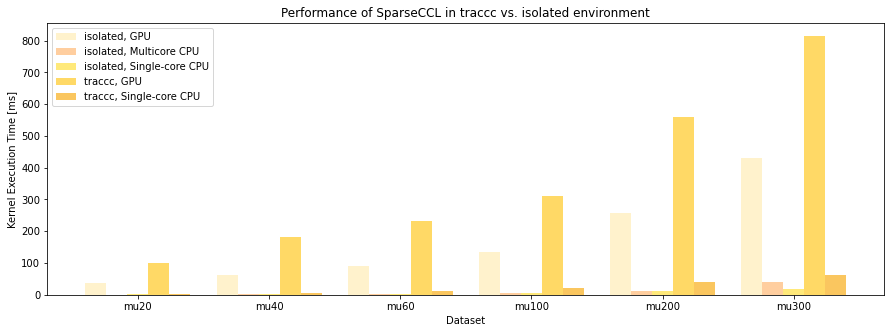

In [22]:
plot_isolated_env_vs_traccc(sparse_ccl, 'SparseCCL')

It can be said, that it is valid to take measurements from isolated env into account for the multicore execution of FastSV and SparseCCL.

It might become easier to interprete when calculating the differences between gpu and single-core version in both environments

The isolated env is about 10% faster for SV algorithms, and even 200%-300% for sparseccl 

## Compare the different FastSV versions on GPU with CUDA and stdpar

In [23]:
sv_algos = df[sv_algo_mask & ~partitioning_mask & ~geforce_mask & traccc_mask & gpu_mask]
preview_df(sv_algos)

,benchmark,programming_model,target_mode,cpu_cores,environment,target,algorithm,partition_size,omega,omega_alt,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
0,cuda_cca,CUDA,GPU,1,traccc,A6000,SimplifiedSV,1024,0.000053,18889.068237,mu20,40191.3,2.127755,150.332303,ms,33,1
12,cuda_cca,CUDA,GPU,1,traccc,A6000,FastSV,1024,0.000052,19117.461489,mu20,40191.3,2.102335,149.758046,ms,33,1
156,stdpar_cca_gpu,std::par,GPU,1,traccc,A6000,SimplifiedSV,1024,15.069146,0.066361,mu20,40191.3,56.328922,268.362841,ms,1,1
168,stdpar_cca_gpu,std::par,GPU,1,traccc,A6000,FastSV,1024,17.113007,0.058435,mu20,40191.3,63.968937,275.816659,ms,1,1


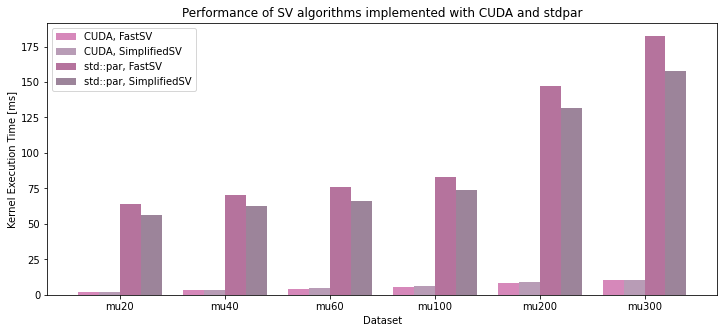

In [24]:
plot_df(df=sv_algos,
        distinct_columns=('programming_model', 'algorithm'),
        label_fields=('programming_model', 'algorithm'), 
        title=f'Performance of SV algorithms implemented with CUDA and stdpar')

The differences for CUDA small, but for stdpar there is a preference for simplified SV. This can be explained by the sequential execution of the algorithm. Thus, less instructions perform better!

## Compare GPUs: A6000 vs GeForce2080

In [25]:
gpu_comparison = df[fast_sv_two_mask & traccc_mask & gpu_mask]
preview_df(gpu_comparison)

,benchmark,programming_model,target_mode,cpu_cores,environment,target,algorithm,partition_size,omega,omega_alt,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
12,cuda_cca,CUDA,GPU,1,traccc,A6000,FastSV,1024,0.000052,19117.461489,mu20,40191.3,2.102335,149.758046,ms,33,1
30,cuda_cca_geforce_2080,CUDA,GPU,1,traccc,GeForce 2080,FastSV,1024,0.000052,19303.268785,mu20,40191.3,2.082098,149.430756,ms,34,1
168,stdpar_cca_gpu,std::par,GPU,1,traccc,A6000,FastSV,1024,17.113007,0.058435,mu20,40191.3,63.968937,275.816659,ms,1,1
192,stdpar_cca_gpu_geforce_2080,std::par,GPU,1,traccc,GeForce 2080,FastSV,1024,4.812203,0.207805,mu20,40191.3,62.958555,277.921045,ms,1,1


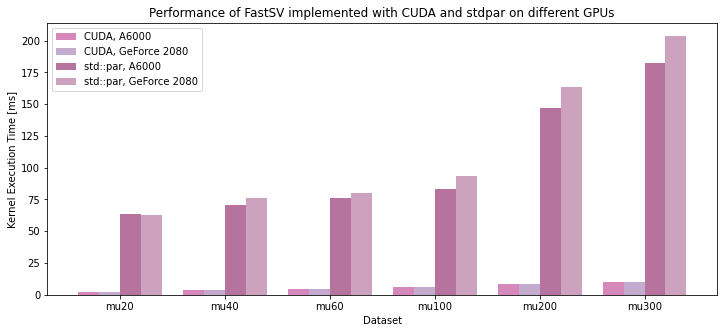

In [26]:
plot_df(df=gpu_comparison,
        distinct_columns=('benchmark', 'programming_model', 'target'),
        label_fields=('programming_model', 'target'), 
        title=f'Performance of FastSV implemented with CUDA and stdpar on different GPUs',
        override_colors=[(1, '#C3ABD0'), (3, '#CDA2BE')]
       )

Values for CUDA seem not to reach the device limits, whereas for stdpar it can be observed with increasing number of activations that A6000 is slightly faster.

In [27]:
stdpar_gpu_comparison = df[gpu_mask & sv_algo_mask & ~partitioning_mask & stdpar_mask & traccc_mask]
preview_df(stdpar_gpu_comparison)

,benchmark,programming_model,target_mode,cpu_cores,environment,target,algorithm,partition_size,omega,omega_alt,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
156,stdpar_cca_gpu,std::par,GPU,1,traccc,A6000,SimplifiedSV,1024,15.069146,0.066361,mu20,40191.3,56.328922,268.362841,ms,1,1
168,stdpar_cca_gpu,std::par,GPU,1,traccc,A6000,FastSV,1024,17.113007,0.058435,mu20,40191.3,63.968937,275.816659,ms,1,1
180,stdpar_cca_gpu_geforce_2080,std::par,GPU,1,traccc,GeForce 2080,SimplifiedSV,1024,4.572744,0.218687,mu20,40191.3,59.825697,272.774419,ms,1,1
192,stdpar_cca_gpu_geforce_2080,std::par,GPU,1,traccc,GeForce 2080,FastSV,1024,4.812203,0.207805,mu20,40191.3,62.958555,277.921045,ms,1,1


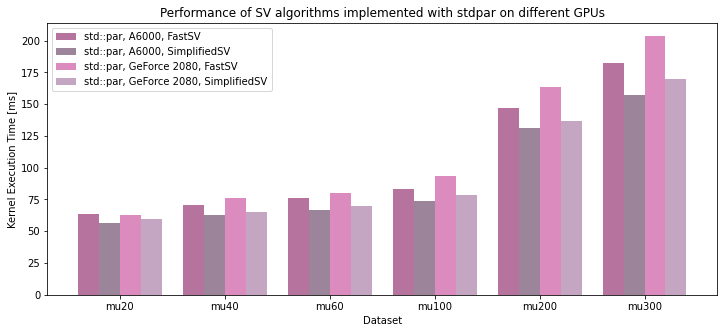

In [28]:
plot_df(df=stdpar_gpu_comparison,
        distinct_columns=('benchmark', 'programming_model', 'target', 'algorithm'),
        label_fields=('programming_model', 'target', 'algorithm'), 
        title=f'Performance of SV algorithms implemented with stdpar on different GPUs',
        override_colors=[(2, '#DB8BBE'), (3, '#C4A6C2')]
       )

So, based on the current measurements. It can be said that the difference is consistent across the algorithms, where the A6000 is slightly faster

## Compare seq and nostdpar

In [29]:
sequential_sparse_ccl_traccc = df[(cpp_mask | overclocked_mask) & sparse_ccl_mask & traccc_mask]
sequential_sparse_ccl_traccc = sequential_sparse_ccl_traccc[sequential_sparse_ccl_traccc['cpu_cores'] == 1]
preview_df(sequential_sparse_ccl_traccc)

,benchmark,programming_model,target_mode,cpu_cores,environment,target,algorithm,partition_size,omega,omega_alt,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
36,seq_cca,C++,Single-core CPU,1,traccc,Xeon 5220,SparseCCL,<NA>,0.000058,17171.210568,mu20,40191.3,2.340621,2.759447,ms,30,1
60,sparse_ccl_multicore_t1_overclocked,std::par,Multicore CPU,1,traccc,Xeon 5220,SparseCCL,<NA>,0.000030,32940.090362,mu20,40191.3,1.220133,16.707920,ms,57,1
144,sparse_ccl_nostdpar_t1_overclocked,std::par,Single-core CPU,1,traccc,Xeon 5220,SparseCCL,<NA>,0.000029,34793.566387,mu20,40191.3,1.155136,32.297286,ms,60,1


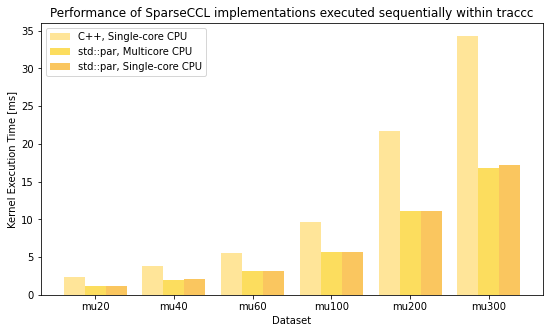

In [30]:
plot_df(df=sequential_sparse_ccl_traccc,
        distinct_columns=('programming_model', 'target_mode'),
        label_fields=('programming_model', 'target_mode'), 
        title=f'Performance of SparseCCL implementations executed sequentially within traccc',
       )

Seems like the result is coherent between multi-core single-threaded and nostdpar. The difference is to small to give any insight.

### Impact of more threads with SparseCCL (not fully done, unstable measurements)

In [31]:
threaded_overclocked_sparseccl = df[overclocked_mask & multicore_mask].sort_values(['cpu_cores', 'activations'])
preview_df(threaded_overclocked_sparseccl)

,benchmark,programming_model,target_mode,cpu_cores,environment,target,algorithm,partition_size,omega,omega_alt,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
60,sparse_ccl_multicore_t1_overclocked,std::par,Multicore CPU,1,traccc,Xeon 5220,SparseCCL,<NA>,0.000030,32940.090362,mu20,40191.3,1.220133,16.707920,ms,57,1
72,sparse_ccl_multicore_t2_overclocked,std::par,Multicore CPU,2,traccc,Xeon 5220,SparseCCL,<NA>,0.000079,12687.114028,mu20,40191.3,1.583942,18.162538,ms,44,1
96,sparse_ccl_multicore_t4_overclocked,std::par,Multicore CPU,4,traccc,Xeon 5220,SparseCCL,<NA>,0.000131,7643.451014,mu20,40191.3,1.314567,18.022277,ms,52,1
132,sparse_ccl_multicore_t8_overclocked,std::par,Multicore CPU,8,traccc,Xeon 5220,SparseCCL,<NA>,0.000404,2474.694009,mu20,40191.3,2.030115,20.039072,ms,32,1
48,sparse_ccl_multicore_t16_overclocked,std::par,Multicore CPU,16,traccc,Xeon 5220,SparseCCL,<NA>,0.000430,2328.210873,mu20,40191.3,1.078921,18.714699,ms,58,1
84,sparse_ccl_multicore_t32_overclocked,std::par,Multicore CPU,32,traccc,Xeon 5220,SparseCCL,<NA>,0.000660,1514.931431,mu20,40191.3,0.829066,19.697176,ms,82,1
108,sparse_ccl_multicore_t64_overclocked,std::par,Multicore CPU,64,traccc,Xeon 5220,SparseCCL,<NA>,0.001402,713.520759,mu20,40191.3,0.880127,20.866223,ms,62,1
120,sparse_ccl_multicore_t72_overclocked,std::par,Multicore CPU,72,traccc,Xeon 5220,SparseCCL,<NA>,0.001552,644.301141,mu20,40191.3,0.866384,20.632943,ms,77,1


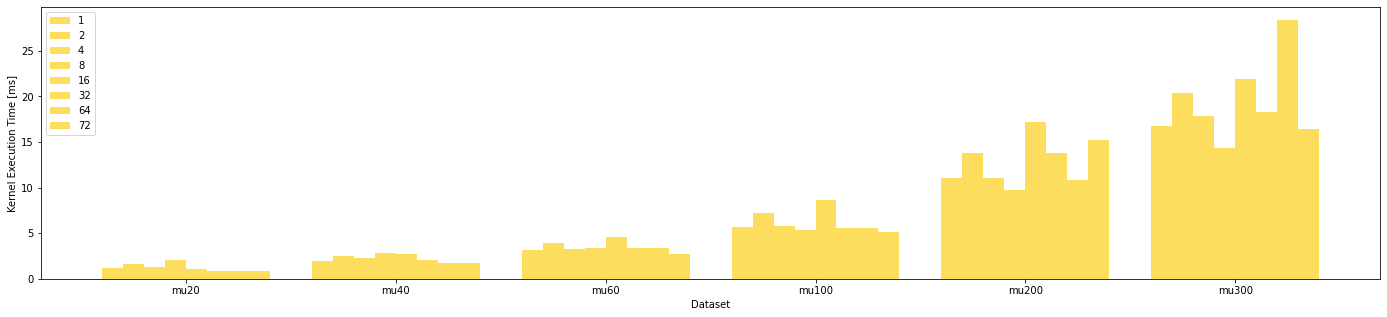

In [32]:
plot_df(df=threaded_overclocked_sparseccl,
        distinct_columns='cpu_cores',
        label_fields='cpu_cores', 
        #title=f'Performance of SparseCCL implementations executed sequentially within traccc',
        # override_colors=[(1, '#C3ABD0'), (3, '#CDA2BE')]
       )

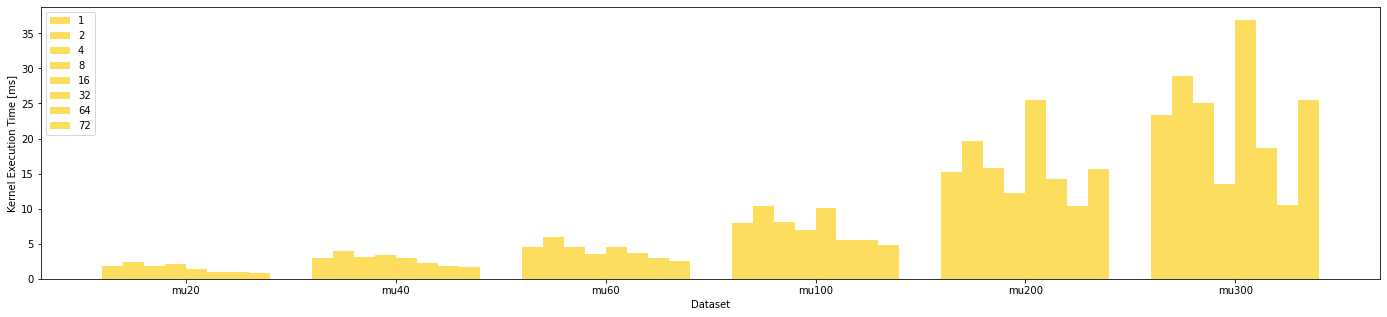

In [33]:
threaded_no_overclock_sparseccl = df[overclock_mask & ~overclocked_mask & multicore_mask].sort_values(['cpu_cores', 'activations'])
plot_df(df=threaded_no_overclock_sparseccl,
        distinct_columns='cpu_cores',
        label_fields='cpu_cores', 
        #title=f'Performance of SparseCCL implementations executed sequentially within traccc',
        # override_colors=[(1, '#C3ABD0'), (3, '#CDA2BE')]
       )

Was not asked, just forget about it

### Hyperparameter Tuning

In [34]:
def dataset_mask(df, dataset):
    dataset_benchmarks = df.query(f"dataset.str.contains('{dataset}')")['dataset']
    dataset_mask = df['dataset'].isin(dataset_benchmarks)
    return dataset_mask

parameter_tuning = df.loc[fast_sv_two_mask &  ~geforce_mask & fast_sv_two_mask & stdpar_mask & isolated_mask & ~nostdpar_mask]
parameter_tuning = parameter_tuning[dataset_mask(df,'mu40') | dataset_mask(df,'mu100') | dataset_mask(df,'mu300')] # take only every second dataset
parameter_tuning[::3]

/tmp/ipykernel_239847/103410870.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  parameter_tuning = parameter_tuning[dataset_mask(df,'mu40') | dataset_mask(df,'mu100') | dataset_mask(df,'mu300')] # take only every second dataset


,benchmark,programming_model,target_mode,cpu_cores,environment,target,algorithm,partition_size,omega,omega_alt,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
223,fast_sv_gpu,std::par,GPU,1,isolated,A6000,FastSV,1024,10.332227,0.096785,mu40,68749.9,66.065811,349.193423,ms,1,1
229,fast_sv_gpu,std::par,GPU,1,isolated,A6000,FastSV,128,2.285656,0.437511,mu40,68749.9,14.614829,255.421247,ms,5,1
235,fast_sv_gpu,std::par,GPU,1,isolated,A6000,FastSV,256,3.154611,0.316996,mu40,68749.9,20.171056,264.082270,ms,4,1
241,fast_sv_gpu,std::par,GPU,1,isolated,A6000,FastSV,512,5.748742,0.173951,mu40,68749.9,36.758316,278.320144,ms,2,1
247,fast_sv_multicore,std::par,Multicore CPU,72,isolated,Xeon 5220,FastSV,1024,0.002490,401.583590,mu40,68749.9,2.377736,283.155951,ms,30,1
253,fast_sv_multicore,std::par,Multicore CPU,72,isolated,Xeon 5220,FastSV,128,0.001252,798.942086,mu40,68749.9,1.195155,282.366468,ms,58,1
259,fast_sv_multicore,std::par,Multicore CPU,72,isolated,Xeon 5220,FastSV,256,0.001506,663.811182,mu40,68749.9,1.438451,282.440651,ms,50,1
265,fast_sv_multicore,std::par,Multicore CPU,72,isolated,Xeon 5220,FastSV,512,0.001744,573.440286,mu40,68749.9,1.665142,282.114506,ms,41,1


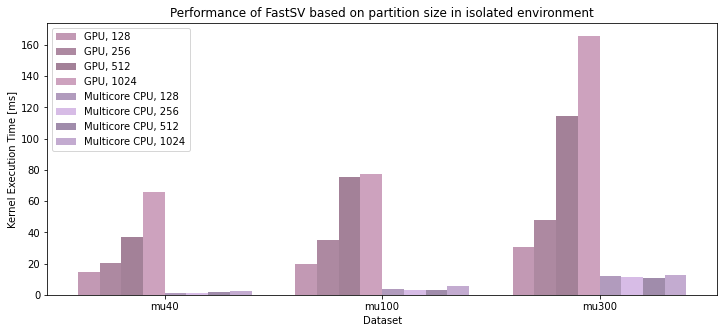

In [35]:
plot_df(df=parameter_tuning,
        distinct_columns=('target_mode', 'partition_size'),
        label_fields=('target_mode', 'partition_size'), 
        title=f'Performance of FastSV based on partition size in isolated environment',
        override_colors=[(0, '#C299B4'), (1, '#AD89A1'), (2, '#A38198'), (4, '#B19BBD'), (5, '#D7BCE6'), (6, '#A08CAB')]
       )

It's interesting to see that there is no impact for multicore, as the load get's balanced anyways. For the GPU however, smaller partitions yield significantly better results! Just don't forget, when treating every activation induvidually, we basically just perform the measurement creation in parallel and all the other work is done before.

### Compare stdpar SimplifiedSV with SparseCCL

Which one is better? Answers the initial question of the project!

In [36]:
small_partition_mask = df['partition_size'] == 128
final_fast_sv_two_mask = fast_sv_two_mask & ~geforce_mask & (cuda_mask | (stdpar_mask & small_partition_mask & ~nostdpar_mask))
final_sparse_ccl_mask = cpp_mask | (sparse_ccl_mask & ~overclock_mask & ~geforce_mask & ~nostdpar_mask & isolated_mask) 

In [37]:
overall = df[final_fast_sv_two_mask | final_sparse_ccl_mask]
preview_df(overall)

,benchmark,programming_model,target_mode,cpu_cores,environment,target,algorithm,partition_size,omega,omega_alt,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
12,cuda_cca,CUDA,GPU,1,traccc,A6000,FastSV,1024,0.000052,19117.461489,mu20,40191.3,2.102335,149.758046,ms,33,1
36,seq_cca,C++,Single-core CPU,1,traccc,Xeon 5220,SparseCCL,<NA>,0.000058,17171.210568,mu20,40191.3,2.340621,2.759447,ms,30,1
228,fast_sv_gpu,std::par,GPU,1,isolated,A6000,FastSV,128,2.636882,0.379236,mu20,40191.3,9.856746,118.352989,ms,7,1
252,fast_sv_multicore,std::par,Multicore CPU,72,isolated,Xeon 5220,FastSV,128,0.001067,937.338925,mu20,40191.3,0.595529,128.953592,ms,123,1
294,sparse_ccl_gpu,std::par,GPU,1,isolated,A6000,SparseCCL,<NA>,9.845492,0.101569,mu20,40191.3,36.802747,179.403852,ms,2,1
300,sparse_ccl_multicore,std::par,Multicore CPU,72,isolated,Xeon 5220,SparseCCL,<NA>,0.001392,718.193515,mu20,40191.3,0.777245,20.695287,ms,90,1


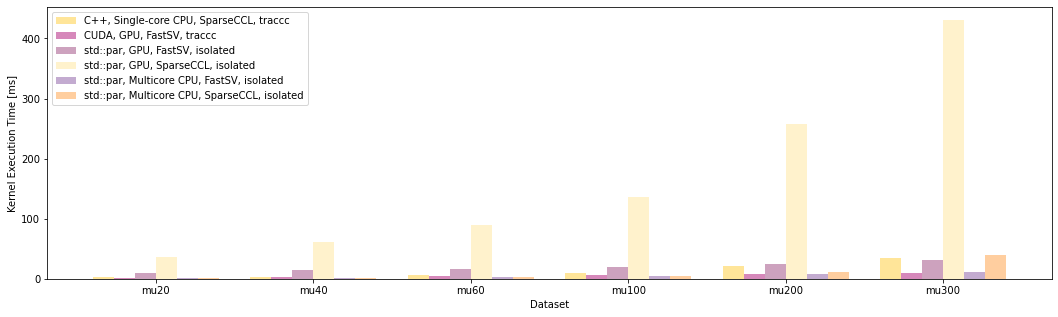

In [38]:
plot_df(df=overall,
        distinct_columns=('programming_model', 'target_mode', 'algorithm', 'environment'),
        label_fields=('programming_model', 'target_mode', 'algorithm', 'environment'), 
        # title=f'Performance of FastSV based on partition size in isolated environment',
       )

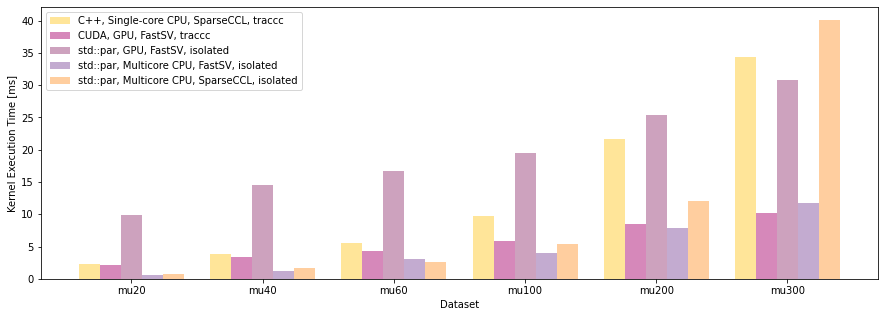

In [39]:
overall_exclude_gpu_sparse_ccl = df[(final_fast_sv_two_mask | final_sparse_ccl_mask) & ~(sparse_ccl_mask & gpu_mask)]
plot_df(df=overall_exclude_gpu_sparse_ccl,
        distinct_columns=('programming_model', 'target_mode', 'algorithm', 'environment'),
        label_fields=('programming_model', 'target_mode', 'algorithm', 'environment'), 
        # title=f'Performance of FastSV based on partition size in isolated environment',
       )

This plot shows somewhat how sparse ccl gets more complex with growing number of activations per detector module (multicore, sparseccl), where as the fixed size partition grows slower.

The GPU sparseCCL is excluded because simply distorting graphic. Makes it unreadable.

### Establish a custom indicator

Check the new indicator: execution time/number of cores (see if any valuable insight). Alternatively, include the number of activations as additional variable

We can take as verification the fact that it the indicator should remain the same regardless of dataset used. This might not be the case, when the GPU is not yet at full capacity. Thus, to establish this indicator, we need a compute bound implementation for GPU, whereas for multicore-CPU it's always possible.

Other verification with thread impact benchmarks for multicore validation. And compare GPU with score for GeForce. Should stay the same!

Computing units for GPU only takes into accounts "Shading Units". It would be more adequate to find out how many units responsible for integer ops are in the A6000...

The Indicator assumes that the preformance increases linearly with the number of cores (not 100% true). 


Think what the indicator should be:

#### `(df['kernel_time'] / df['activations']) * df['computing_units']` = omega = execution time per computing unit for a single activation
The idea is to normalize with `df['kernel_time'] / df['activations']` to get time for processing a single activation. This should remain the same for datasets of a single algorithm. Then `* df['computing_units']` gives the time it took for a single computing unit to process one activation.
Gives at least a result that allows identifying the when an algorithm becomes compute bound :')

#### `(df['activations'] / df['computing_units']) / df['kernel_time']` = omega_alt
`df['activations'] / df['computing_units']` =  the computational charge on a single computing unit. And then we calculate a ratio how long it took the unit to execute it, ergo, the computational charge on a single computing unit `/ df['kernel_time']`. 
(not sure about division or multiplication with kernel_time)

#### Helper functions

In [40]:
# data = list of data inputs
# datalabels = list of labels for the data
# labels = x value labels
def plot_multi_line_chart(data, datalabels, labels, colors, y_axis_label, title=None, filename=None):
    num_data = len(labels)

    X_axis = np.arange(num_data)

    plt.figure(figsize=(8,5))
       
    # iterate over data and adjust offset after each iteration
    for d, l, c in zip (data, datalabels, colors):
        plt.plot(X_axis, d, label=l, color=c, marker='o')

    plt.xticks(X_axis, labels)
    plt.xlabel("Dataset")
    plt.ylabel(y_axis_label)
    plt.legend()
    if title:
        plt.title(title)
    if filename:
        save_plot(plt, filename)
    plt.show()

#### Analyze stdpar on GPU

In [41]:
core_efficiency_gpu_sv = df[gpu_mask & ~geforce_mask & stdpar_mask & sv_algo_mask].copy()
preview_df(core_efficiency_gpu_sv)

,benchmark,programming_model,target_mode,cpu_cores,environment,target,algorithm,partition_size,omega,omega_alt,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
156,stdpar_cca_gpu,std::par,GPU,1,traccc,A6000,SimplifiedSV,1024,15.069146,0.066361,mu20,40191.3,56.328922,268.362841,ms,1,1
168,stdpar_cca_gpu,std::par,GPU,1,traccc,A6000,FastSV,1024,17.113007,0.058435,mu20,40191.3,63.968937,275.816659,ms,1,1
222,fast_sv_gpu,std::par,GPU,1,isolated,A6000,FastSV,1024,16.237333,0.061586,mu20,40191.3,60.695642,198.189951,ms,1,1
228,fast_sv_gpu,std::par,GPU,1,isolated,A6000,FastSV,128,2.636882,0.379236,mu20,40191.3,9.856746,118.352989,ms,7,1
234,fast_sv_gpu,std::par,GPU,1,isolated,A6000,FastSV,256,3.790262,0.263834,mu20,40191.3,14.168112,122.459436,ms,5,1
240,fast_sv_gpu,std::par,GPU,1,isolated,A6000,FastSV,512,8.148953,0.122715,mu20,40191.3,30.461031,138.920599,ms,2,1


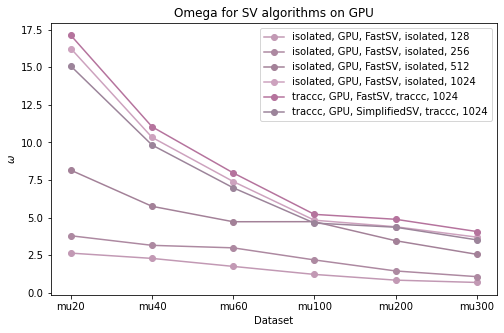

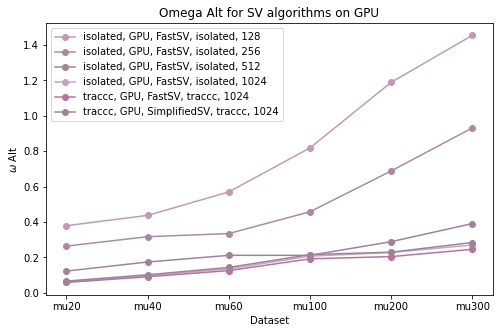

In [42]:
plot_df(df=core_efficiency_gpu_sv,
            distinct_columns=('environment', 'target_mode','algorithm','environment','partition_size'),
            label_fields=('environment', 'target_mode','algorithm','environment', 'partition_size'), 
            value_field='omega',
            title=f'Omega for SV algorithms on GPU',
            override_colors=[(0, '#C299B4'), (1, '#AD89A1'), (2, '#A38198')],
            value_axis_label='$\omega$',
            plot_func=plot_multi_line_chart
    )

plot_df(df=core_efficiency_gpu_sv,
            distinct_columns=('environment', 'target_mode','algorithm','environment','partition_size'),
            label_fields=('environment', 'target_mode','algorithm','environment', 'partition_size'), 
            value_field='omega_alt',
            title=f'Omega Alt for SV algorithms on GPU',
            override_colors=[(0, '#C299B4'), (1, '#AD89A1'), (2, '#A38198')],
            value_axis_label='$\omega$ Alt',
            plot_func=plot_multi_line_chart
    )

In [43]:
core_efficiency_gpu_sparse_ccl = df[gpu_mask & ~geforce_mask & stdpar_mask & sparse_ccl_mask].copy()
preview_df(core_efficiency_gpu_sparse_ccl)

,benchmark,programming_model,target_mode,cpu_cores,environment,target,algorithm,partition_size,omega,omega_alt,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
150,stdpar_cca_gpu,std::par,GPU,1,traccc,A6000,SparseCCL,<NA>,26.918521,0.037149,mu20,40191.3,100.622242,393.128219,ms,1,1
294,sparse_ccl_gpu,std::par,GPU,1,isolated,A6000,SparseCCL,<NA>,9.845492,0.101569,mu20,40191.3,36.802747,179.403852,ms,2,1


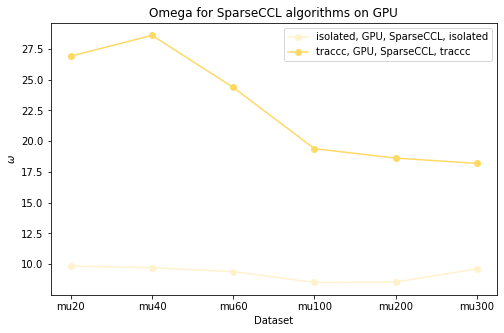

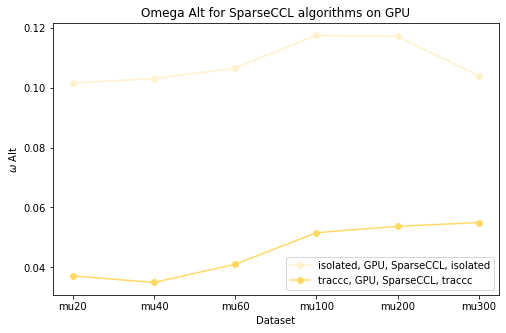

In [44]:
plot_df(df=core_efficiency_gpu_sparse_ccl,
            distinct_columns=('environment', 'target_mode','algorithm','environment'),
            label_fields=('environment', 'target_mode','algorithm','environment'), 
            value_field='omega',
            title=f'Omega for SparseCCL algorithms on GPU',
            value_axis_label='$\omega$',
            plot_func=plot_multi_line_chart
    )

plot_df(df=core_efficiency_gpu_sparse_ccl,
            distinct_columns=('environment', 'target_mode','algorithm','environment'),
            label_fields=('environment', 'target_mode','algorithm','environment'), 
            value_field='omega_alt',
            title=f'Omega Alt for SparseCCL algorithms on GPU',
            value_axis_label='$\omega$ Alt',
            plot_func=plot_multi_line_chart
    )

The plot above does not yet tell us a lot, but the stabilisation of the GPU variants is a good sign that the algorithm are compute bound from mu100 on.

Isolated 1024 and traccc 1024 fast sv 2 behave more or less the same. Thus, showing that it is algorithm specific, at least the asymptotical behavior

#### Analyze CUDA on GPU

In [45]:
cuda = df[sv_algo_mask & cuda_mask]
preview_df(cuda)

,benchmark,programming_model,target_mode,cpu_cores,environment,target,algorithm,partition_size,omega,omega_alt,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
0,cuda_cca,CUDA,GPU,1,traccc,A6000,SimplifiedSV,1024,0.000053,18889.068237,mu20,40191.3,2.127755,150.332303,ms,33,1
12,cuda_cca,CUDA,GPU,1,traccc,A6000,FastSV,1024,0.000052,19117.461489,mu20,40191.3,2.102335,149.758046,ms,33,1
18,cuda_cca_geforce_2080,CUDA,GPU,1,traccc,GeForce 2080,SimplifiedSV,1024,0.000052,19194.377926,mu20,40191.3,2.093910,152.941683,ms,33,1
30,cuda_cca_geforce_2080,CUDA,GPU,1,traccc,GeForce 2080,FastSV,1024,0.000052,19303.268785,mu20,40191.3,2.082098,149.430756,ms,34,1


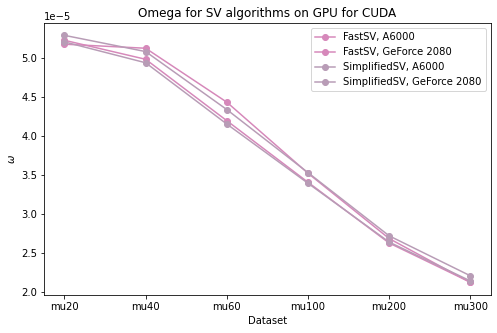

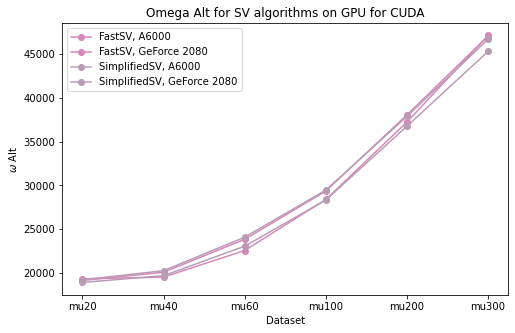

In [46]:
plot_df(df=cuda,
            distinct_columns=('algorithm','target'),
            label_fields=('algorithm','target'), 
            value_field='omega',
            title=f'Omega for SV algorithms on GPU for CUDA',
            value_axis_label='$\omega$',
            plot_func=plot_multi_line_chart
    )

plot_df(df=cuda,
            distinct_columns=('algorithm','target'),
            label_fields=('algorithm','target'), 
            value_field='omega_alt',
            title=f'Omega Alt for SV algorithms on GPU for CUDA',
            value_axis_label='$\omega$ Alt',
            plot_func=plot_multi_line_chart
    )

It is already on a very small scale. Thus, hard to tell. For sure is, that increasing the load would further improve performance. We have are not yet compute bound.

The thing about not being compute bound is that increased number of threads (coming with more data) allows hiding the latency better!

#### Analyze stdpar on multicore CPU

Stopped working on this because not promising enough

### Latex Table for Benchmark Overview

MUST SORT MANUALLY MULTI CORE BENCHMARKS

In [81]:
selection_for_latex = df[~overclock_mask] .copy()

selection_for_latex = selection_for_latex.loc[:, (
    'programming_model',
    'target_mode', 
    'target', 
    'cpu_cores', 
    'environment', 
    'algorithm', 
    'partition_size', 
    'dataset',
    'kernel_time')]

ds_20 =  (selection_for_latex['dataset'] == 'mu20')
ds_200 = (selection_for_latex['dataset'] == 'mu200')
selection_for_latex = selection_for_latex[(ds_20 | ds_200)]
selection_for_latex['kernel_time'] = selection_for_latex['kernel_time'].round(2)
selection_for_latex

,programming_model,target_mode,target,cpu_cores,environment,algorithm,partition_size,dataset,kernel_time
0,CUDA,GPU,A6000,1,traccc,SimplifiedSV,1024,mu20,2.13
4,CUDA,GPU,A6000,1,traccc,SimplifiedSV,1024,mu200,8.81
12,CUDA,GPU,A6000,1,traccc,FastSV,1024,mu20,2.10
16,CUDA,GPU,A6000,1,traccc,FastSV,1024,mu200,8.51
18,CUDA,GPU,GeForce 2080,1,traccc,SimplifiedSV,1024,mu20,2.09
22,CUDA,GPU,GeForce 2080,1,traccc,SimplifiedSV,1024,mu200,8.55
30,CUDA,GPU,GeForce 2080,1,traccc,FastSV,1024,mu20,2.08
34,CUDA,GPU,GeForce 2080,1,traccc,FastSV,1024,mu200,8.69
36,C++,Single-core CPU,Xeon 5220,1,traccc,SparseCCL,<NA>,mu20,2.34
40,C++,Single-core CPU,Xeon 5220,1,traccc,SparseCCL,<NA>,mu200,21.66


In [87]:
output = selection_for_latex.pivot(index=[
    'programming_model',
    'target_mode', 
    'target', 
    'cpu_cores', 
    'environment', 
    'algorithm', 
    'partition_size'], columns='dataset', values='kernel_time')
output

dataset                                                                                             mu20  \
programming_model target_mode     target       cpu_cores environment algorithm    partition_size           
C++               Single-core CPU Xeon 5220    1         traccc      SparseCCL    NaN               2.34   
CUDA              GPU             A6000        1         traccc      FastSV       1024              2.10   
                                                                     SimplifiedSV 1024              2.13   
                                  GeForce 2080 1         traccc      FastSV       1024              2.08   
                                                                     SimplifiedSV 1024              2.09   
std::par          GPU             A6000        1         isolated    FastSV       128               9.86   
                                                                                  256              14.17   
                                                                                  512              30.46   
                                                                                  1024             60.70   
                                                                     SparseCCL    NaN              36.80   
                                                         traccc      FastSV       1024             63.97   
                                                                     SimplifiedSV 1024             56.33   
                                                                     SparseCCL    NaN             100.62   
                                  GeForce 2080 1         traccc      FastSV       1024             62.96   
                                                                     SimplifiedSV 1024             59.83   
                                                                     SparseCCL    NaN              92.25   
                  Multicore CPU   Xeon 5220    72        isolated    FastSV       128               0.60   
                                                                                  256               0.75   
                                                                                  512               1.12   
                                                                                  1024              1.88   
                                                                     SparseCCL    NaN               0.78   
                  Single-core CPU Xeon 5220    1         isolated    FastSV       128               2.48   
                                                                                  256               2.85   
                                                                                  512               3.71   
                                                                                  1024              5.54   
                                                                     SparseCCL    NaN               1.17   
                                                         traccc      FastSV       1024              6.18   
                                                                     SimplifiedSV 1024              5.23   
                                                                     SparseCCL    NaN               3.24   

dataset                                                                                            mu200  
programming_model target_mode     target       cpu_cores environment algorithm    partition_size          
C++               Single-core CPU Xeon 5220    1         traccc      SparseCCL    NaN              21.66  
CUDA              GPU             A6000        1         traccc      FastSV       1024              8.51  
                                                                     SimplifiedSV 1024              8.81  
                                  GeForce 2080 1         traccc      FastSV       1024              8.69  
         

In [88]:
print(output.to_latex())

\begin{tabular}{lllllllrr}
\toprule
         &                 &           &    &        &           & dataset &    mu20 &   mu200 \\
programming\_model & target\_mode & target & cpu\_cores & environment & algorithm & partition\_size &         &         \\
\midrule
C++ & Single-core CPU & Xeon 5220 & 1  & traccc & SparseCCL & NaN &    2.34 &   21.66 \\
CUDA & GPU & A6000 & 1  & traccc & FastSV & 1024 &    2.10 &    8.51 \\
         &                 &           &    &        & SimplifiedSV & 1024 &    2.13 &    8.81 \\
         &                 & GeForce 2080 & 1  & traccc & FastSV & 1024 &    2.08 &    8.69 \\
         &                 &           &    &        & SimplifiedSV & 1024 &    2.09 &    8.55 \\
std::par & GPU & A6000 & 1  & isolated & FastSV & 128  &    9.86 &   25.33 \\
         &                 &           &    &        &           & 256  &   14.17 &   43.76 \\
         &                 &           &    &        &           & 512  &   30.46 &  104.33 \\
         &    

/tmp/ipykernel_239847/1011106639.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(output.to_latex())


### Evaluate Reliability

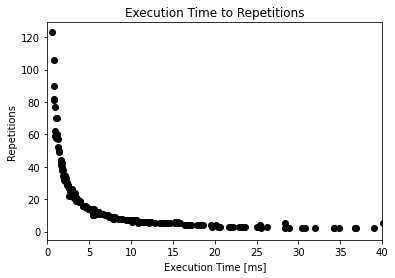

In [106]:
plt.plot(df['kernel_time'], df['iterations'], marker='o', color='black', linestyle='None')
plt.xlim((0, 40))

plt.xlabel('Execution Time [ms]')
plt.ylabel('Repetitions')
activation_event_relation_title = 'Execution Time to Repetitions'
plt.title(activation_event_relation_title)
save_plot(plt, activation_event_relation_title)
plt.show()